In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/final_data.csv',index_col=False)
df.head()

,year,Households_owner_equity,saving,saving_rate,population,unemployment,Employment_Population_Ratio,price_index
0,2002,104965.583333,10614.533333,5.575000,287954.583333,5.783333,62.733333,122.287833
1,2003,105559.916667,10884.391667,5.191667,290626.250000,5.991667,62.266667,133.741167
2,2004,106588.000000,11233.175000,4.650000,293262.333333,5.541667,62.350000,150.464167
3,2005,108231.166667,11364.858333,2.250000,295992.916667,5.083333,62.683333,171.779333
4,2006,109575.000000,11777.783333,2.775000,298817.666667,4.608333,63.116667,183.481417


In [4]:
df.describe()

,year,Households_owner_equity,saving,saving_rate,population,unemployment,Employment_Population_Ratio,price_index
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,2012.500000,115806.193561,13511.235000,5.843939,314520.291667,5.893285,60.296350,183.596396
std,6.493587,7458.058961,2004.590571,2.845602,15229.596812,1.871895,1.847804,49.652959
min,2002.000000,104965.583333,10614.533333,2.250000,287954.583333,3.627273,56.766667,122.287833
25%,2007.250000,110581.354167,12101.806250,4.575000,302407.895833,4.610417,58.702083,149.030979
50%,2012.500000,114637.666667,13031.287500,5.520833,315912.208333,5.454167,60.041667,171.974458
75%,2017.750000,120755.833333,15011.204167,6.306250,328310.791667,7.058333,62.245833,199.695625
max,2023.000000,129906.666667,17138.716667,15.208333,335132.000000,9.608333,63.116667,303.621222


1. No missing value.
2. No any skewness in data.
3. no outliers in data.
4. mean and 50% percentile is approx equal to data distribution is appear like normal distribution.

### Univariant Analysis

#### Households_owner_equity vs price_index

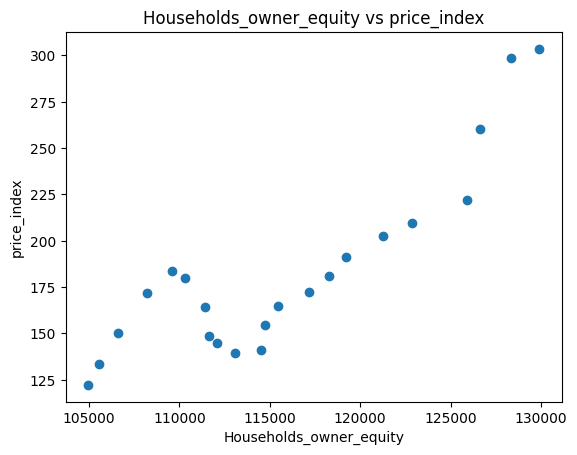

In [6]:
plt.scatter(df['Households_owner_equity'],df['price_index'])
plt.xlabel('Households_owner_equity')
plt.ylabel('price_index')
plt.title('Households_owner_equity vs price_index')
plt.show()

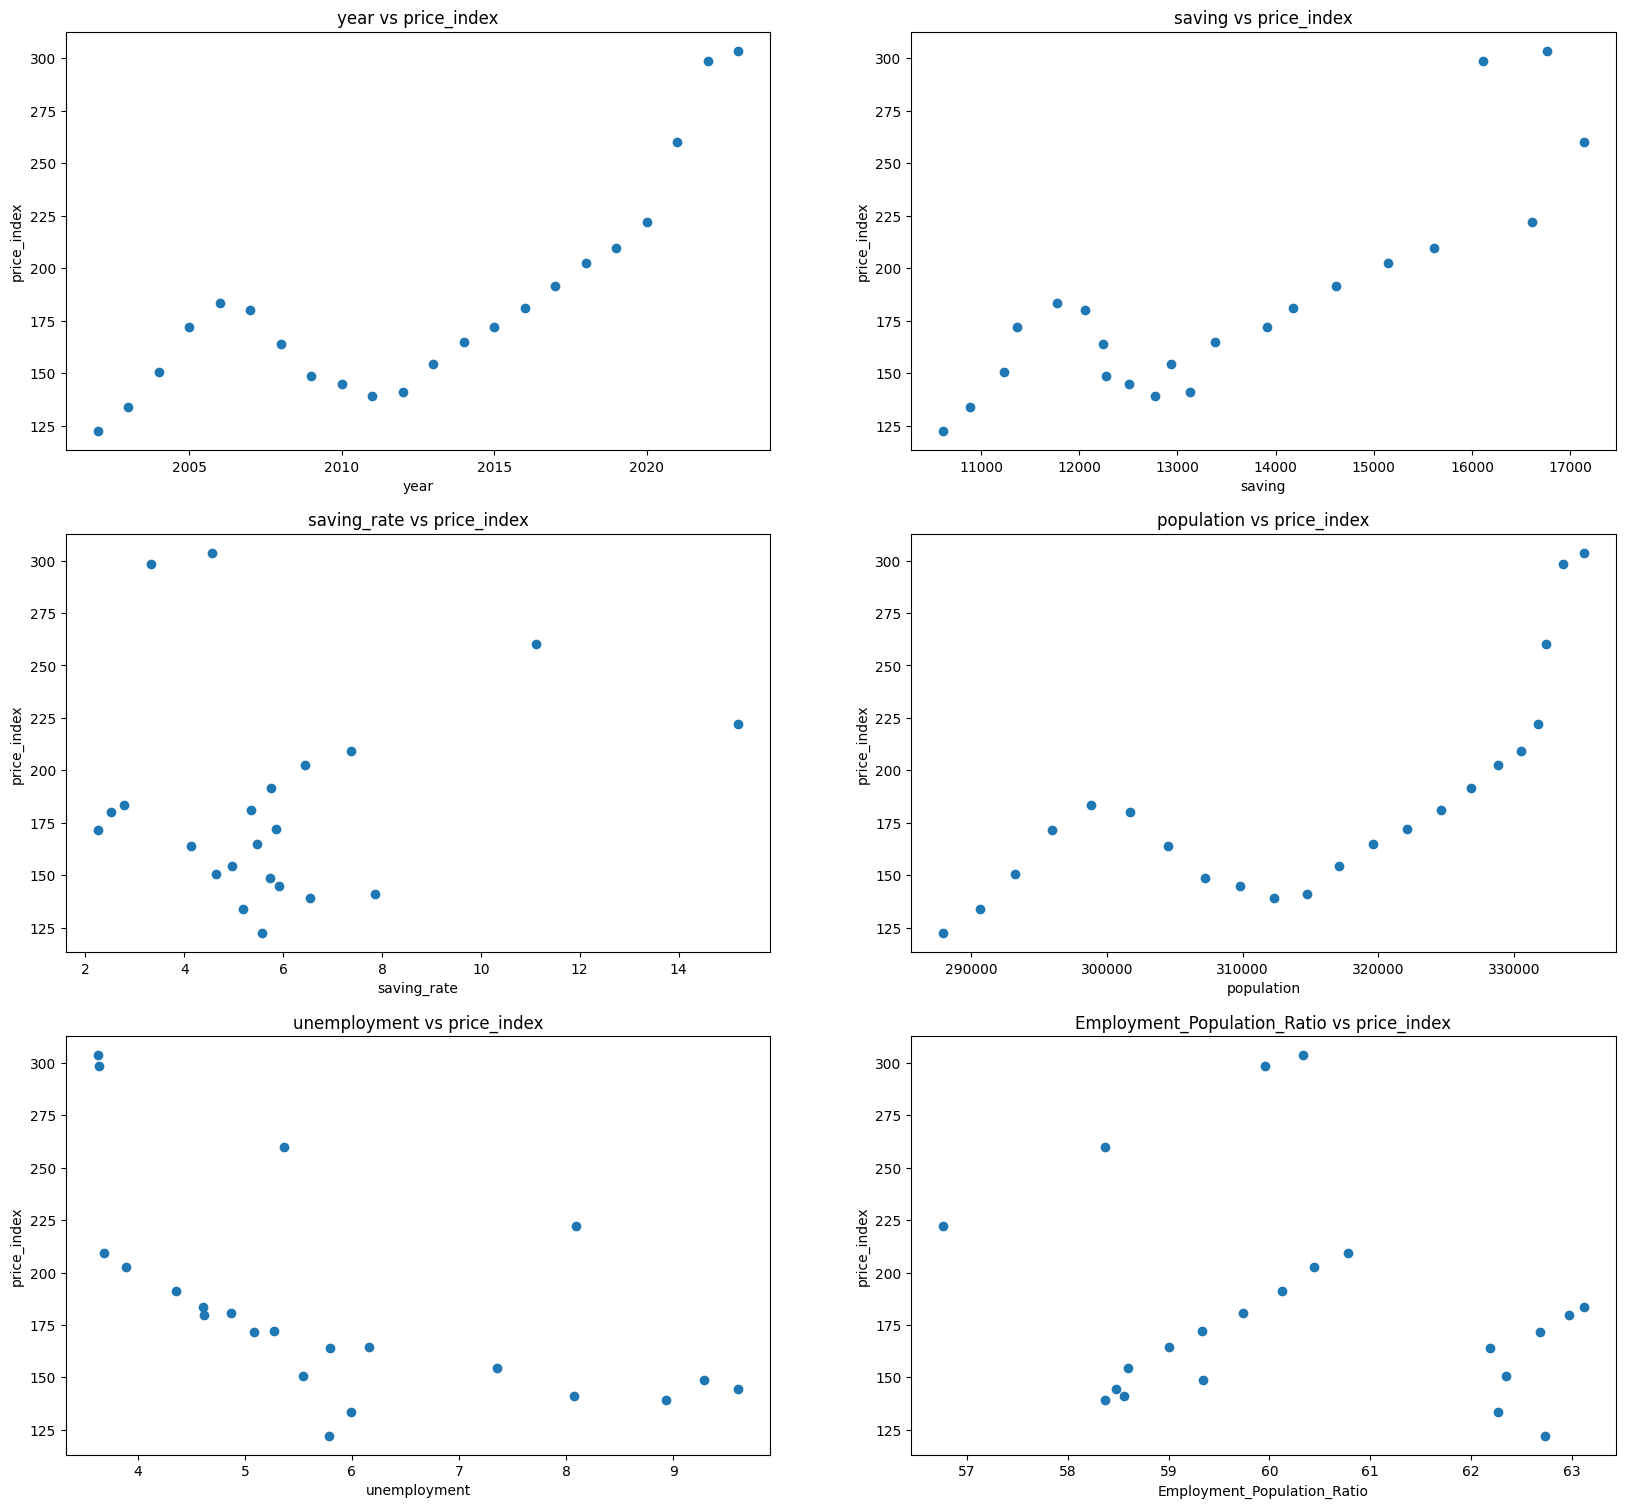

In [9]:
plt.figure(figsize=(20,25))
graph = 1

col_list = ['year','saving',	'saving_rate',	'population','unemployment','Employment_Population_Ratio']

for col in col_list:
  if graph <= 7:
    ax = plt.subplot(4,2,graph)
    plt.scatter(df[col],df['price_index'])
    plt.xlabel(col)
    plt.ylabel('price_index')
    plt.title(f"{col} vs price_index")
  graph +=1
plt.show()

1. Saving rate column has not relation with price index.
2. Unemployment has negative relationship with price_index.
3. Rest all columns has positive relationship with price_index.

In [20]:
# Import required Libraries for train machine learning
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

In [15]:
x = df.drop(columns=['price_index'])
y = df.price_index

In [18]:
scale = StandardScaler()
x_scaled = scale.fit_transform(x)
x_scaled.shape

(22, 7)

In [19]:
y.shape

(22,)

In [31]:
lin = LinearRegression()

In [27]:
x_scaled = scale.fit_transform(x)

In [32]:
lin.fit(x_scaled,y)

LinearRegression()

In [33]:
model_coe = lin.coef_

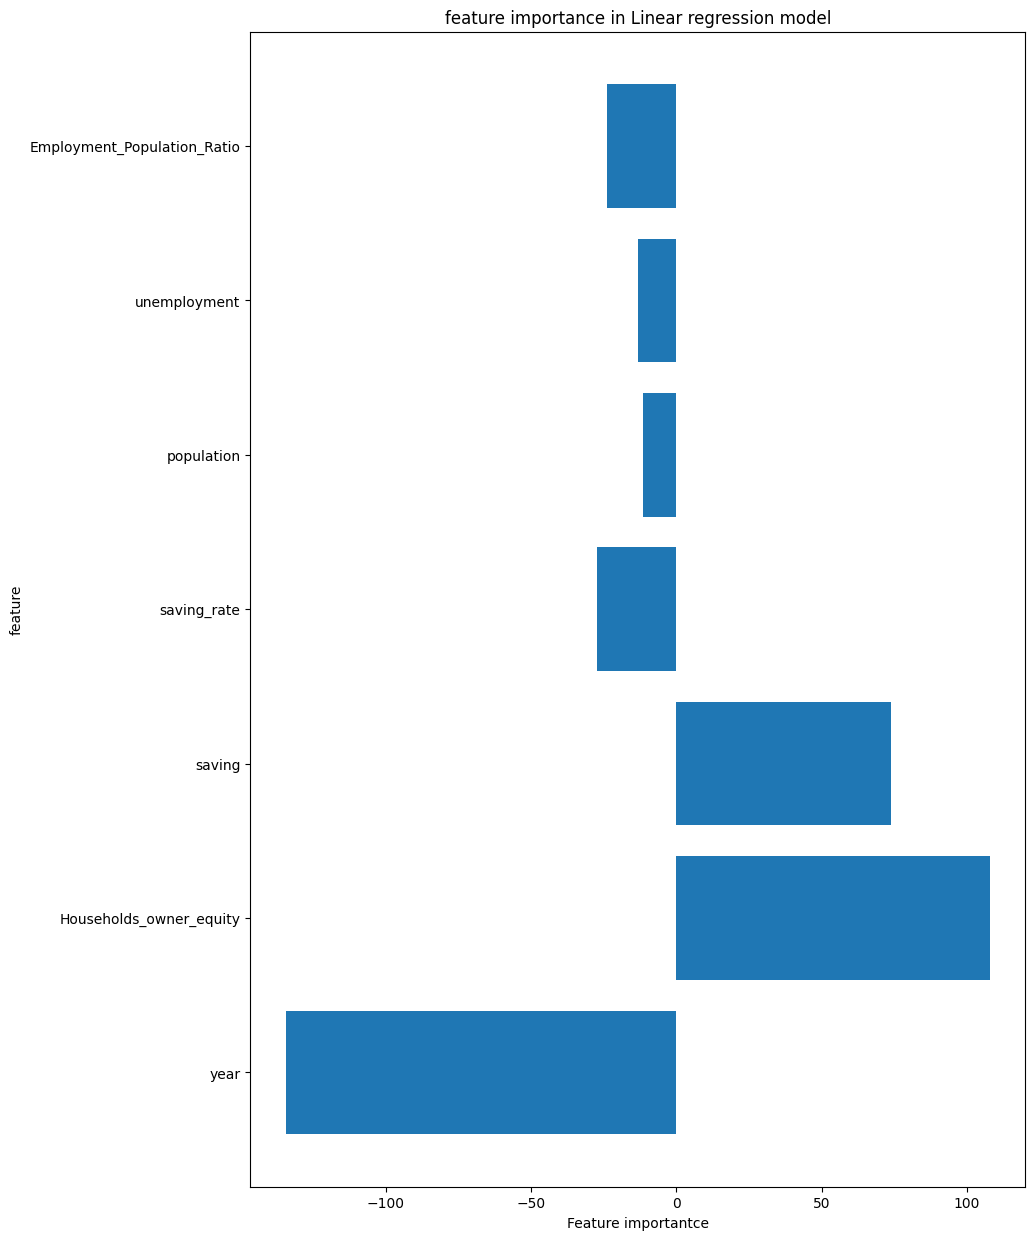

In [36]:
plt.figure(figsize=(10,15))
plt.barh(x.columns, model_coe)
plt.xlabel('Feature importantce')
plt.ylabel('feature')
plt.title('feature importance in Linear regression model')
plt.show()